In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-dataavjh/Train_aBjfeNk.csv
/kaggle/input/customer-segmentation-dataavjh/Test_LqhgPWU.csv
/kaggle/input/customer-segmentation-dataavjh/sample_submission_wyi0h0z.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv('/kaggle/input/customer-segmentation-dataavjh/Train_aBjfeNk.csv')
test = pd.read_csv('/kaggle/input/customer-segmentation-dataavjh/Test_LqhgPWU.csv')
sample = pd.read_csv('/kaggle/input/customer-segmentation-dataavjh/sample_submission_wyi0h0z.csv')

In [5]:
train_target = train['Segmentation']
train = train.drop(['Segmentation'], axis=1)

In [6]:
print(train.shape)
print(test.shape)

(8068, 10)
(2627, 10)


In [8]:
train.head(2)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4


In [9]:
train.dtypes, test.dtypes

(ID                   int64
 Gender              object
 Ever_Married        object
 Age                  int64
 Graduated           object
 Profession          object
 Work_Experience    float64
 Spending_Score      object
 Family_Size        float64
 Var_1               object
 dtype: object,
 ID                   int64
 Gender              object
 Ever_Married        object
 Age                  int64
 Graduated           object
 Profession          object
 Work_Experience    float64
 Spending_Score      object
 Family_Size        float64
 Var_1               object
 dtype: object)

In [10]:
train.nunique()

ID                 8068
Gender                2
Ever_Married          2
Age                  67
Graduated             2
Profession            9
Work_Experience      15
Spending_Score        3
Family_Size           9
Var_1                 7
dtype: int64

In [11]:
train.Var_1.fillna('Cat_10', inplace=True)
train.Var_1 = train['Var_1'].apply(lambda x:int(str(x).split('_')[1]))

test.Var_1.fillna('Cat_10', inplace=True)
test.Var_1 = test['Var_1'].apply(lambda x:int(str(x).split('_')[1]))

In [12]:
Profession = {
    'Healthcare':0,
    'Engineer':1,
    'Lawyer':2,
    'Entertainment':3,
    'Artist':4,
    'Executive':5,
    'Doctor':6,
    'Homemaker':7,
    'Marketing':8,
    np.nan:10
}
Gender = {
    'Male':0,
    'Female':1,
    np.nan:10
}
Ever_Married = {
    'Yes':0,
    'No':1,
    np.nan:10
}
Graduated = {
    'Yes':0,
    'No':1,
    np.nan:10
}
Spending_Score = {
    'Low':0,
    'Average':1,
    'High':2,
    np.nan:10
}
to_change = [Gender, Ever_Married, Graduated, Spending_Score, Profession] 

for i in to_change:
  train = train.replace(i)
  test = test.replace(i)

In [13]:
train.nunique()

ID                 8068
Gender                2
Ever_Married          3
Age                  67
Graduated             3
Profession           10
Work_Experience      15
Spending_Score        3
Family_Size          10
Var_1                 8
dtype: int64

In [14]:
train.dtypes

ID                   int64
Gender               int64
Ever_Married         int64
Age                  int64
Graduated            int64
Profession           int64
Work_Experience    float64
Spending_Score       int64
Family_Size        float64
Var_1                int64
dtype: object

In [ ]:
# train_target = train_target.replace(
#     {
#         'A':0,
#         'B':1,
#         'C':2,
#         'D':3
#     }
# )

# Missing Value Analysis

In [15]:
train.isna().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [16]:
test.isna().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [18]:
train = train.replace({10:np.nan})
test = test.replace({10:np.nan})
train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809.0,0.0,1.0,22.0,1.0,0.0,1.0,0.0,4.0,4.0
1,462643.0,1.0,0.0,38.0,0.0,1.0,NaN,1.0,3.0,4.0
2,466315.0,1.0,0.0,67.0,0.0,1.0,1.0,0.0,1.0,6.0
3,461735.0,0.0,0.0,67.0,0.0,2.0,0.0,2.0,2.0,6.0
4,462669.0,1.0,0.0,40.0,0.0,3.0,NaN,2.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...
8063,464018.0,0.0,1.0,22.0,1.0,NaN,0.0,0.0,7.0,1.0
8064,464685.0,0.0,1.0,35.0,1.0,5.0,3.0,0.0,4.0,4.0
8065,465406.0,1.0,1.0,33.0,0.0,0.0,1.0,0.0,1.0,6.0
8066,467299.0,1.0,1.0,27.0,0.0,0.0,1.0,0.0,4.0,6.0


In [19]:
from fancyimpute import KNN
train = pd.DataFrame(KNN(k = 3).fit_transform(train), columns = test.columns)
test = pd.DataFrame(KNN(k = 3).fit_transform(test), columns = test.columns)

Imputing row 1/8068 with 0 missing, elapsed time: 12.733
Imputing row 101/8068 with 0 missing, elapsed time: 12.739
Imputing row 201/8068 with 0 missing, elapsed time: 12.741
Imputing row 301/8068 with 1 missing, elapsed time: 12.744
Imputing row 401/8068 with 0 missing, elapsed time: 12.746
Imputing row 501/8068 with 0 missing, elapsed time: 12.748
Imputing row 601/8068 with 0 missing, elapsed time: 12.751
Imputing row 701/8068 with 0 missing, elapsed time: 12.753
Imputing row 801/8068 with 0 missing, elapsed time: 12.755
Imputing row 901/8068 with 0 missing, elapsed time: 12.757
Imputing row 1001/8068 with 0 missing, elapsed time: 12.759
Imputing row 1101/8068 with 0 missing, elapsed time: 12.761
Imputing row 1201/8068 with 0 missing, elapsed time: 12.763
Imputing row 1301/8068 with 0 missing, elapsed time: 12.764
Imputing row 1401/8068 with 1 missing, elapsed time: 12.767
Imputing row 1501/8068 with 0 missing, elapsed time: 12.769
Imputing row 1601/8068 with 1 missing, elapsed time:

In [20]:
train.nunique()

ID                 8068
Gender                2
Ever_Married         84
Age                  67
Graduated            56
Profession          127
Work_Experience     869
Spending_Score        3
Family_Size         341
Var_1                73
dtype: int64

In [21]:
for i in train.columns:
  train[i] = train[i].apply(lambda x: int(round(x)))
  test[i] = test[i].apply(lambda x: int(round(x)))

In [22]:
train.dtypes

ID                 int64
Gender             int64
Ever_Married       int64
Age                int64
Graduated          int64
Profession         int64
Work_Experience    int64
Spending_Score     int64
Family_Size        int64
Var_1              int64
dtype: object

# Model

### Training Data

In [23]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,0,1,22,1,0,1,0,4,4
1,462643,1,0,38,0,1,5,1,3,4
2,466315,1,0,67,0,1,1,0,1,6
3,461735,0,0,67,0,2,0,2,2,6
4,462669,1,0,40,0,3,4,2,6,6


In [24]:
train = pd.concat([train, train_target], axis=1)
train.shape

(8068, 11)

In [ ]:
# train.to_csv('train.csv',index=False)
# test.to_csv('test.csv', index=False)

# Analysis

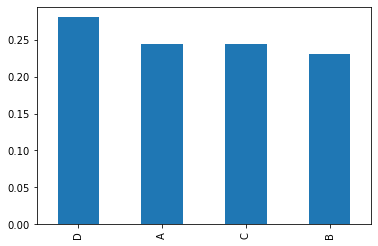

In [26]:
train['Segmentation'].value_counts(normalize= True).plot.bar()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [33]:
X = train
X.shape

(8068, 11)

In [34]:
y = X['Segmentation']
X = X.drop(['ID', 'Segmentation'], axis=1)
# X = X[['Age', 'Graduated', 'Profession', 'Spending_Score']]


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,1,22,1,0,1,0,4,4
1,1,0,38,0,1,5,1,3,4
2,1,0,67,0,1,1,0,1,6
3,0,0,67,0,2,0,2,2,6
4,1,0,40,0,3,4,2,6,6
...,...,...,...,...,...,...,...,...,...
8063,0,1,22,1,0,0,0,7,1
8064,0,1,35,1,5,3,0,4,4
8065,1,1,33,0,0,1,0,1,6
8066,1,1,27,0,0,1,0,4,6


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## XGB

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from xgboost.sklearn import XGBClassifier

In [38]:
grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
kf = KFold(n_splits=2)

gs = GridSearchCV(estimator = XGBClassifier(n_estimators=500), param_grid = grid, scoring='accuracy',n_jobs=4, cv=kf)

In [39]:
gs.fit(X_train, y_train)

y_pred = gs.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 51.05%


In [40]:
gs.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=2,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [42]:
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[06:13:09] WARNING: ../src/learner.cc:516: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Accuracy: 50.87%


In [43]:
X_train.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1'],
      dtype='object')

In [44]:
xgb.feature_importances_

array([0.05029566, 0.14739546, 0.11238921, 0.1992391 , 0.15353104,
       0.04486784, 0.1708062 , 0.06537363, 0.05610174], dtype=float32)

## SVM

In [45]:
from sklearn.ensemble import RandomForestClassifier
clf_svm = RandomForestClassifier(
    n_estimators=1000
)

clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 46.72%


# Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(
    max_depth=2, 
    random_state=0,
    n_estimators=500,
    
)

clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 46.34%


# Final

In [47]:
xgb.fit(X, y)

predictions = xgb.predict(test.drop(['ID'], axis=1))

[06:15:37] WARNING: ../src/learner.cc:516: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [48]:
submission = pd.DataFrame({
    'ID':test['ID'],
    'Segmentation':predictions
    })

In [49]:
submission.reset_index(inplace=True, drop=True)

In [ ]:
submission.to_csv('xgb.csv',index=False)

In [ ]:
df = pd.read_csv('xgb.csv')
df.head()